In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
sns.set_theme(palette='colorblind')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
# load the bike stations and yelp poi dataframes
bike_stations = pd.read_csv('../data/bike_stations_barcelona.csv', index_col=0)
yelp_poi = pd.read_csv('../data/bike_stations_barcelona_poi_yelp1.csv', index_col=0)

# Rename bike_stations id column to match yelp_poi so they can be merged
bike_stations = bike_stations.rename(columns={'id': 'station_id'})

In [5]:
# Checking the number of rows of each df
print(bike_stations.shape)
print(yelp_poi.shape)

(505, 6)
(4204, 8)


In [6]:
# Join both dataframes based on the station_id
full_df = pd.merge(bike_stations, yelp_poi, how='outer', on='station_id')

full_df = full_df.rename(columns={'name_x': 'station_name', 'name_y': 'poi_name'})

full_df.head()

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
0,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",J1vHLZvSRfkNpy2x8OuVaQ,Torre Rosa,21.0,4.0,€€,501.236274,"['Carrer de Francesc Tàrrega, 22', '08027 Barc..."
1,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",oD9g3jw6UoebuiI3GtSGww,Tasca I Vins,10.0,4.0,€,191.557179,"['Calle Cardenal Tedeschini, 32', '08027 Barce..."
2,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",iRrsa0bQbTtHzBjsHIprqQ,Beering Barcelona,10.0,4.5,€,828.625543,"['Carrer de las Navas de Tolosa, 355', '08041 ..."
3,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",e6bRub-8J0j5PDm55UNASA,Toca Teca,3.0,4.5,€,395.734907,"['Carrer Garcilaso, 172', '08027 Barcelona', '..."
4,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",UdRmo2dstOYd29Ihs5vI8w,La Vermuteria de Sant Andreu,4.0,4.0,€€,508.573281,"['Rambla de Fabra I Puig, 51', '08030 Barcelon..."


In [7]:
# Checking if the merge worked correctly
print('Diff of number of bike stations:', bike_stations.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

Diff of number of bike stations: 0
Diff of number of POI: -360


As seen above, there are two extra rows on the dataframe after the merge when comparing the rows of yelp_poi dataframe. Further investigation is needed to identify the reason.

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4564 entries, 0 to 4563
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   4564 non-null   int64  
 1   free_bikes    4564 non-null   int64  
 2   station_id    4564 non-null   object 
 3   latitude      4564 non-null   float64
 4   longitude     4564 non-null   float64
 5   station_name  4564 non-null   object 
 6   poi_id        4204 non-null   object 
 7   poi_name      4204 non-null   object 
 8   review_count  4204 non-null   float64
 9   rating        4204 non-null   float64
 10  price         3511 non-null   object 
 11  distance      4204 non-null   float64
 12  full_address  4204 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 499.2+ KB


In [9]:
# Identify the points of interest that are null
full_df[full_df['poi_id'].isnull()]

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
3581,29,0,8fdb03b50ec6c7d2a4fd6522f041aac6,41.427608,2.169758,"C/ ESCULTOR LLIMONA, 7",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3858,20,13,1161584f0cdec1e6c63e016824fe9db4,41.388036,2.125625,"AV. DIAGONAL, 672",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3859,29,6,c6edb376f8c2f0e7f2b70725c36402c9,41.430413,2.183417,"AV. MERIDIANA, 404",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4023,28,9,aa57523a41ed37cd0eca001803241c37,41.371873,2.180302,WORLD TRADE CENTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,25,4,85754ee6b3be59b9e61376c7d72cd0eb,41.409593,2.152495,"C/ MAIGNON, 31-41",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,0,13,465d5fbd9f725cdd4dbdba1f0612ce64,41.389322,2.167839,"GRAN VIA DE LES CORTS CATALANES, 609",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4560,25,7,9c003bbd85b2e441cd85d2fe1142f1b9,41.357329,2.137200,"C/ DE L'ENERGIA, 2 / ALTS FORNS",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4561,14,13,1b5961d97851faaca78308b3afeef662,41.397900,2.208845,"AV.LITORAL, 84",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4562,0,14,43cd75e496ecd2187a03c10902556277,41.389063,2.167931,"GRAN VIA DE LES CORTS CATALANES, 632",NaN,NaN,NaN,NaN,NaN,NaN,NaN


**It is concluded that the two new rows on full_df are for two bike stations without any point of interest (bars or restaurants) in a 1000-meter radius.**

In [10]:
#save data
full_df.to_csv('../data/bike_stations_barcelona_full_poi.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [10]:
full_df.head()

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
0,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",J1vHLZvSRfkNpy2x8OuVaQ,Torre Rosa,21.0,4.0,€€,501.236274,"['Carrer de Francesc Tàrrega, 22', '08027 Barc..."
1,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",oD9g3jw6UoebuiI3GtSGww,Tasca I Vins,10.0,4.0,€,191.557179,"['Calle Cardenal Tedeschini, 32', '08027 Barce..."
2,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",iRrsa0bQbTtHzBjsHIprqQ,Beering Barcelona,10.0,4.5,€,828.625543,"['Carrer de las Navas de Tolosa, 355', '08041 ..."
3,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",e6bRub-8J0j5PDm55UNASA,Toca Teca,3.0,4.5,€,395.734907,"['Carrer Garcilaso, 172', '08027 Barcelona', '..."
4,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",UdRmo2dstOYd29Ihs5vI8w,La Vermuteria de Sant Andreu,4.0,4.0,€€,508.573281,"['Rambla de Fabra I Puig, 51', '08030 Barcelon..."


In [11]:
full_df.shape

(4564, 13)

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4564 entries, 0 to 4563
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   4564 non-null   int64  
 1   free_bikes    4564 non-null   int64  
 2   station_id    4564 non-null   object 
 3   latitude      4564 non-null   float64
 4   longitude     4564 non-null   float64
 5   station_name  4564 non-null   object 
 6   poi_id        4204 non-null   object 
 7   poi_name      4204 non-null   object 
 8   review_count  4204 non-null   float64
 9   rating        4204 non-null   float64
 10  price         3511 non-null   object 
 11  distance      4204 non-null   float64
 12  full_address  4204 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 499.2+ KB


format price to string

In [13]:
# Counts number of null in the price column
(full_df['price'].isnull()).sum()

1053

In [14]:
# Check the counts of each price category
full_df['price'].value_counts()

€€      1865
€        894
€€€      571
€€€€     181
Name: price, dtype: int64

In [15]:
# Fill all null values with a str category
full_df['price'] = full_df['price'].fillna('#')

# Convert the str category to number category
full_df['price'] = full_df['price'].astype('category').cat.codes

In [16]:
# Check the counts of each price category
full_df['price'].value_counts()

2    1865
0    1053
1     894
3     571
4     181
Name: price, dtype: int64

Price category description

- Category 0 = Not listed

- Category 1 = $

- Category 2 = \$$

- Category 3 = $$$

- Category 4 = \$$\$$

In [17]:
full_df.describe()

,empty_slots,free_bikes,latitude,longitude,review_count,rating,price,distance
count,4564.000000,4564.000000,4564.000000,4564.000000,4204.000000,4204.000000,4564.000000,4.204000e+03
mean,16.610649,9.405127,41.401676,2.166276,62.165081,4.282231,1.547108,5.640604e+02
std,7.593426,6.303520,0.022123,0.024118,143.200032,0.543139,1.094371,3.379880e+02
min,0.000000,0.000000,41.346775,2.109154,1.000000,1.000000,0.000000,5.307630e-09
25%,11.000000,4.000000,41.380393,2.145342,5.000000,4.000000,1.000000,2.698003e+02
50%,17.000000,9.000000,41.398624,2.170732,17.000000,4.500000,2.000000,5.064788e+02
75%,22.000000,14.000000,41.418400,2.185207,55.000000,4.500000,2.000000,8.603785e+02
max,50.000000,31.000000,41.462095,2.220691,1568.000000,5.000000,4.000000,1.381367e+03


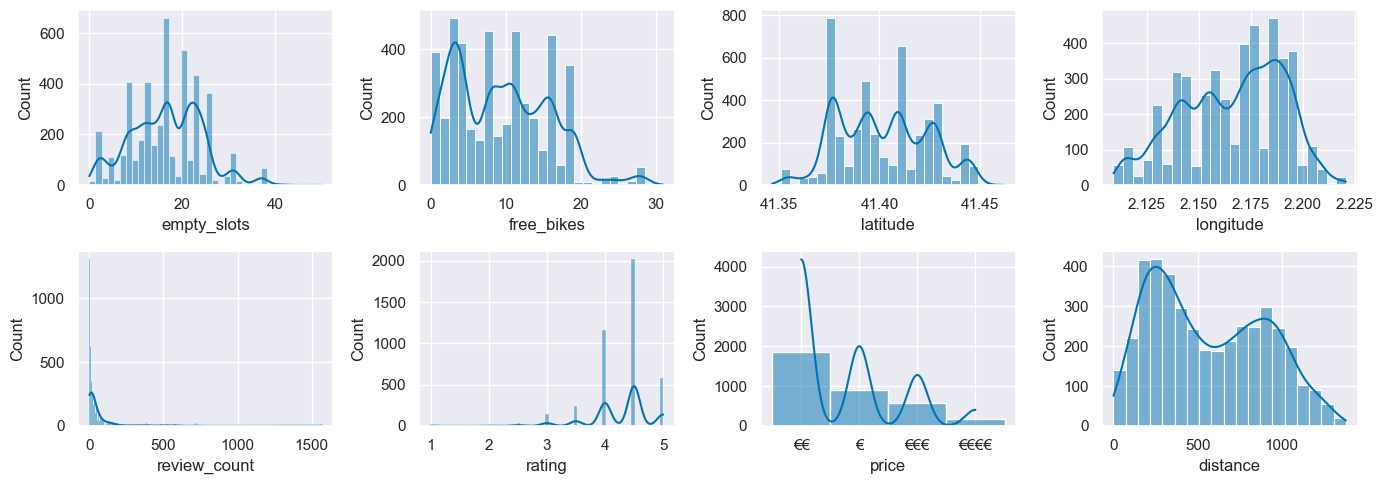

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(14, 5))

sns.histplot(ax=axes[0,0], data=full_df, x='empty_slots', kde=True)
sns.histplot(ax=axes[0,1], data=full_df, x='free_bikes', kde=True)
sns.histplot(ax=axes[0,2], data=full_df, x='latitude', kde=True)
sns.histplot(ax=axes[0,3], data=full_df, x='longitude', kde=True)
sns.histplot(ax=axes[1,0], data=full_df, x='review_count', kde=True)
sns.histplot(ax=axes[1,1], data=full_df, x='rating', kde=True)
sns.histplot(ax=axes[1,2], data=full_df, x='price', kde=True)
sns.histplot(ax=axes[1,3], data=full_df, x='distance', kde=True)

fig.tight_layout()

plt.show()

fig.savefig('../images/full_df_hist.svg')

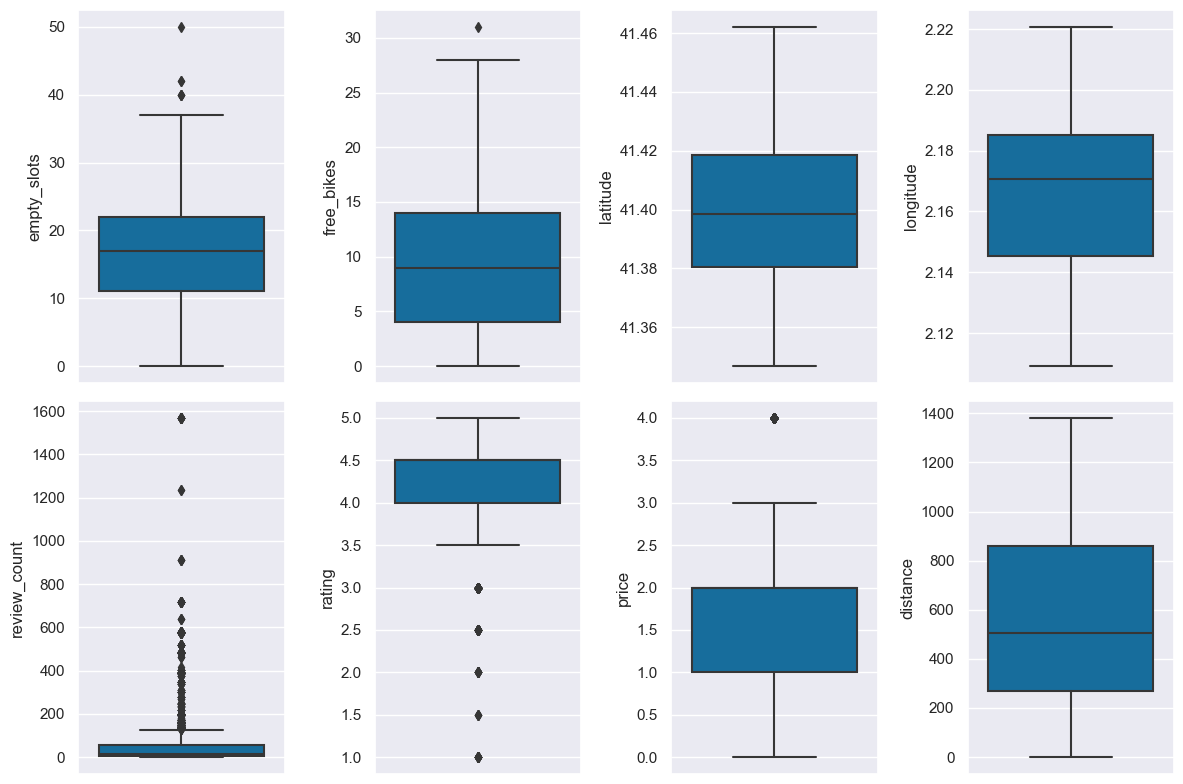

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))


sns.boxplot(ax=axes[0, 0], data=full_df, y='empty_slots')
sns.boxplot(ax=axes[0, 1], data=full_df, y='free_bikes')
sns.boxplot(ax=axes[0, 2], data=full_df, y='latitude')
sns.boxplot(ax=axes[0, 3], data=full_df, y='longitude')
sns.boxplot(ax=axes[1, 0], data=full_df, y='review_count')
sns.boxplot(ax=axes[1, 1], data=full_df, y='rating')
sns.boxplot(ax=axes[1, 2], data=full_df, y='price')
sns.boxplot(ax=axes[1, 3], data=full_df, y='distance')


plt.tight_layout()

plt.show()

fig.savefig('../images/full_df_boxplot.svg')

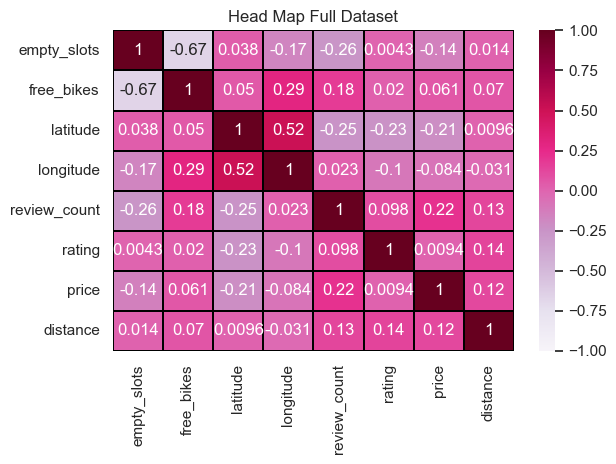

In [20]:
ax = sns.heatmap(full_df.select_dtypes(exclude=[object]).corr(), vmin=-1, vmax=1, cmap='PuRd', annot=True, linewidth=.1, linecolor="black")
ax.set(title='Head Map Full Dataset')

plt.tight_layout()

plt.savefig('../images/full_df_heatmap.svg')
plt.show()

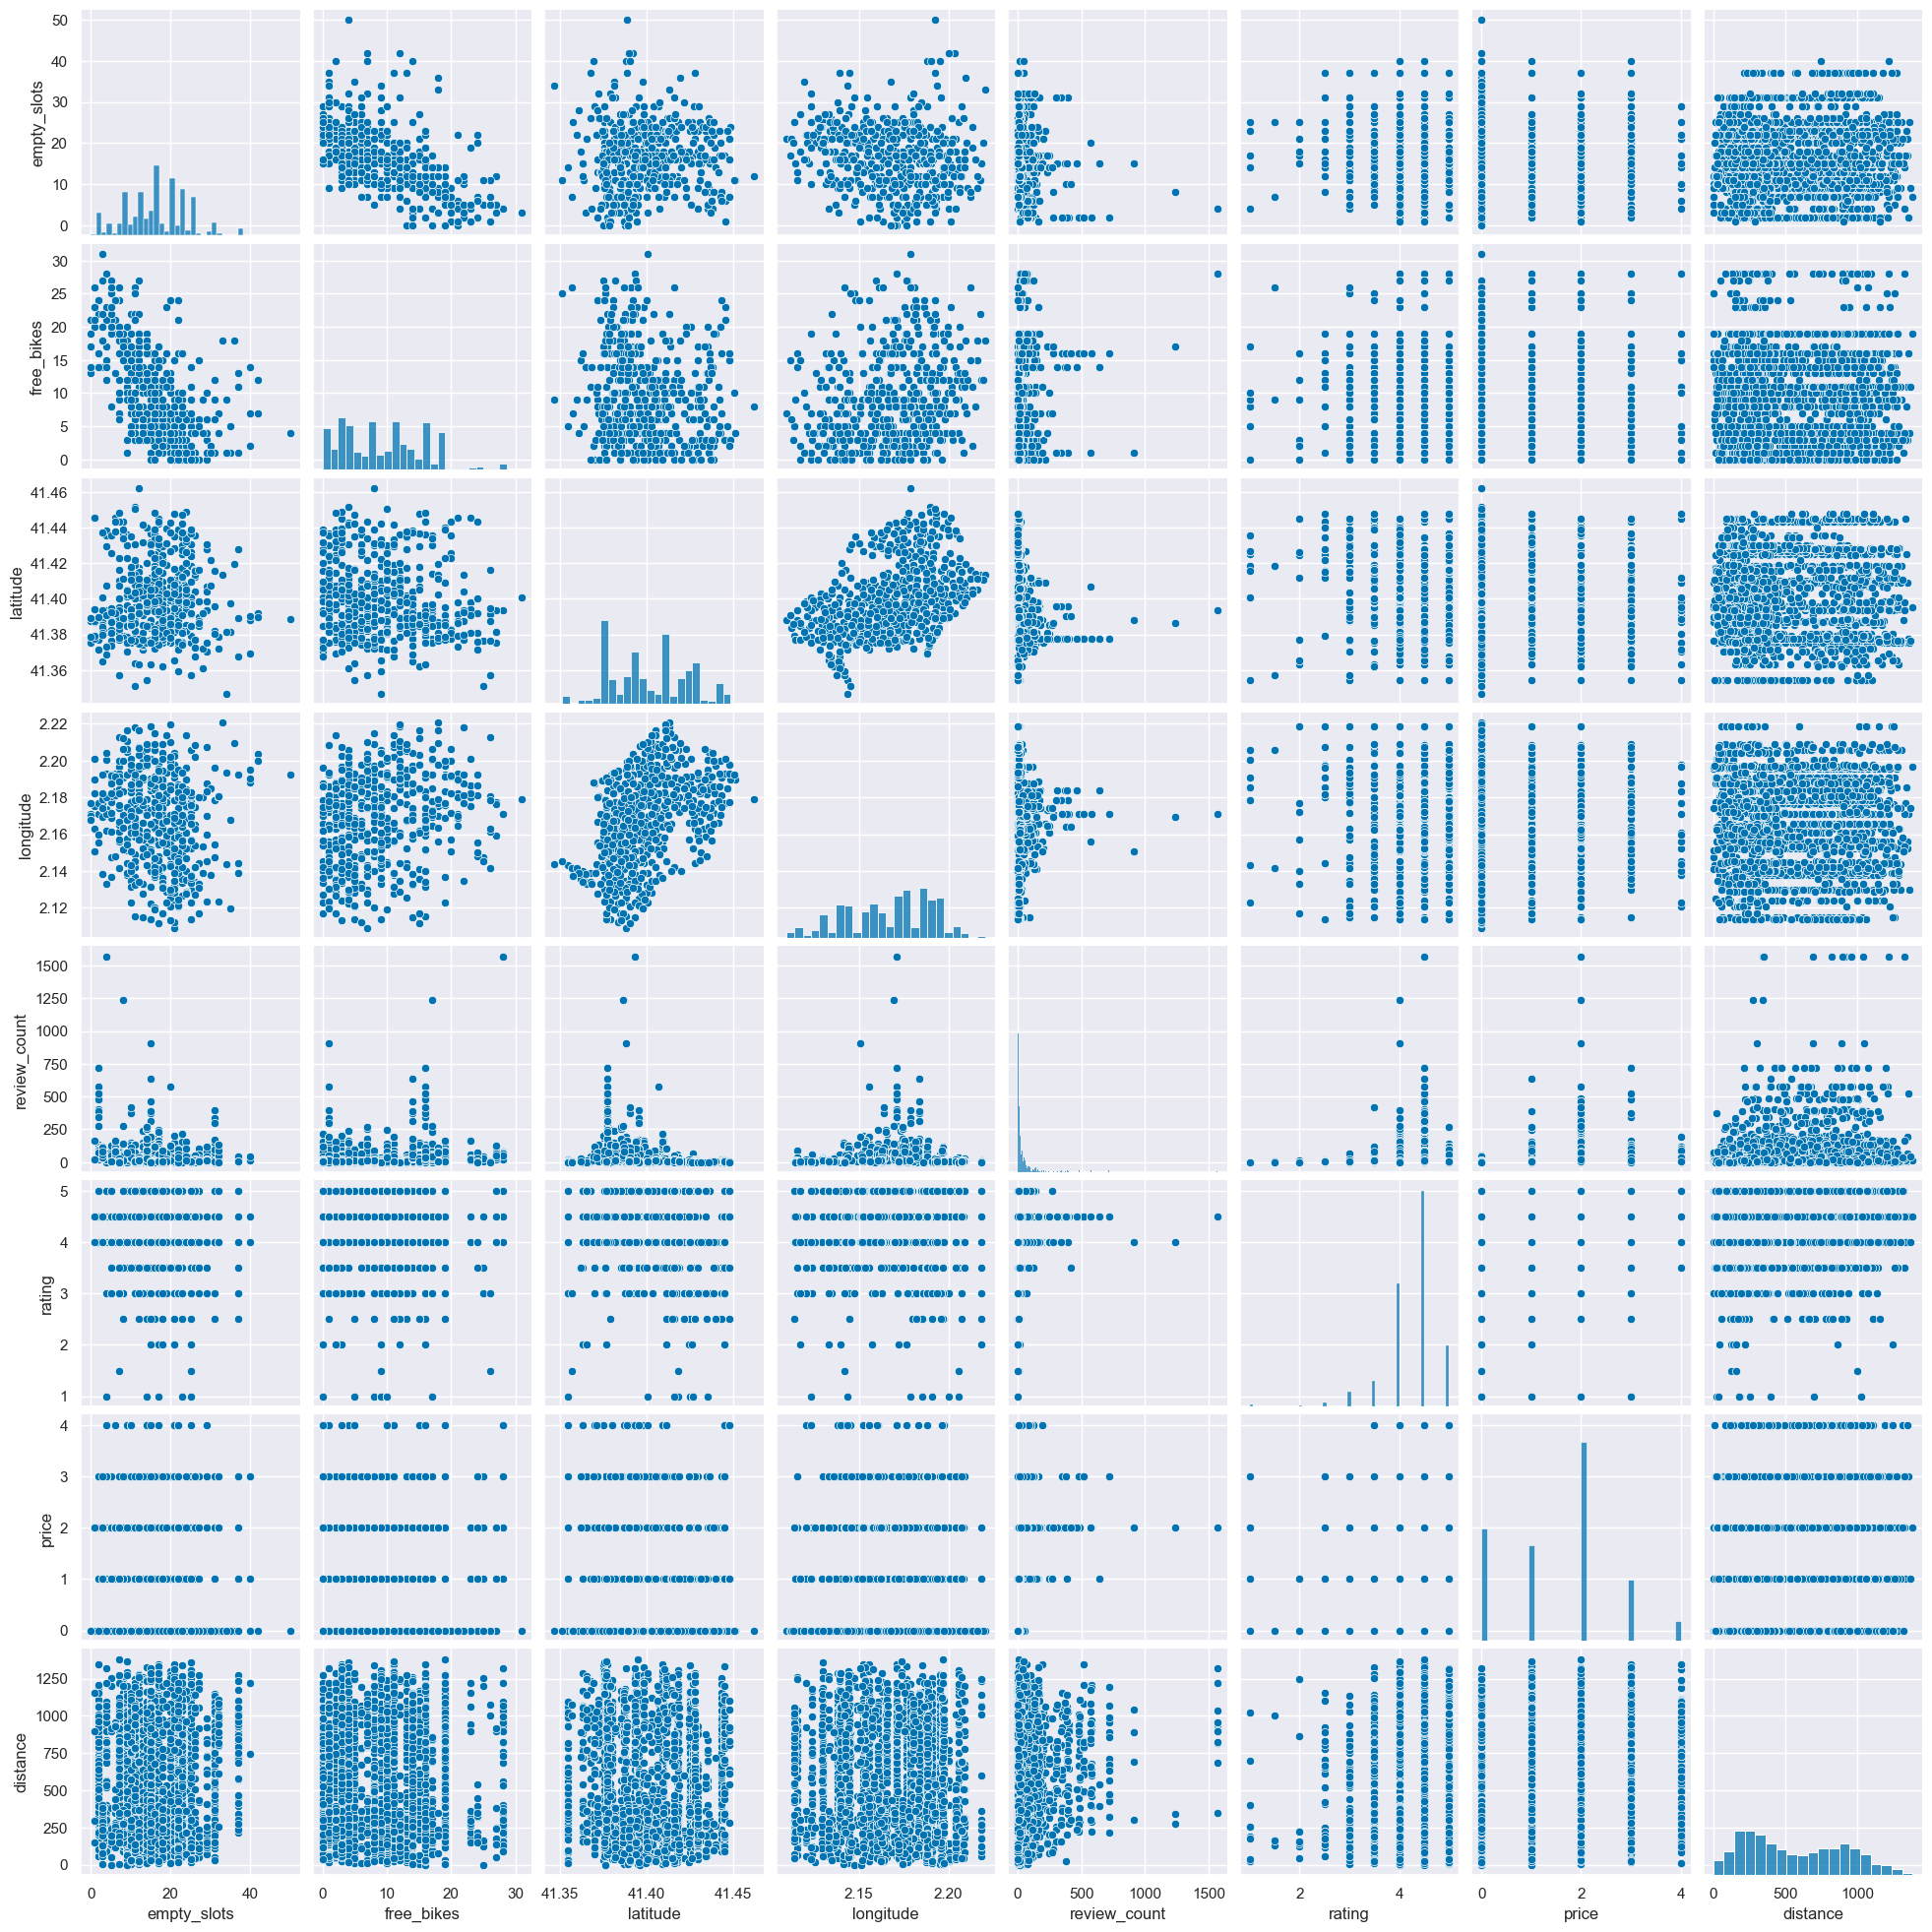

In [21]:
sns.pairplot(full_df)

plt.savefig('../images/full_df_pairgrid.svg')
plt.show()

In [23]:
grouped_by_station = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()

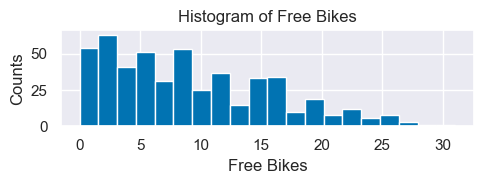

In [24]:
fig, ax = plt.subplots(figsize=(5,2))
ax.hist(grouped_by_station['free_bikes'], bins=20)
ax.set_title('Histogram of Free Bikes')
ax.set_xlabel('Free Bikes')
ax.set_ylabel('Counts')

plt.tight_layout()

plt.savefig('../images/grouped_by_station_hist1.svg')

plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [ ]:
connection = create_connection("../data/hamilton_bikes.sqlite")

Look at the data before and after the join to validate your data.

In [ ]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [ ]:
bike_stations.info()

In [ ]:
create_bike_stations_table = """
CREATE TABLE IF NOT EXISTS bike_stations_hamilton (
  empty_slots INTEGER,
  free_bikes INTEGER,
  station_id TEXT NOT NULL PRIMARY KEY,
  latitude FLOAT,
  longitude FLOAT,
  name TEXT
);
"""

In [ ]:
execute_query(connection, create_bike_stations_table)

In [ ]:
yelp_poi.info()

In [ ]:
create_yelp_poi_table = """
CREATE TABLE IF NOT EXISTS yelp_poi_hamilton (
  poi_id TEXT,
  name TEXT,
  review_count FLOAT,
  rating FLOAT,
  price TEXT,
  distance FLOAT,
  full_address TEXT,
  station_id TEXT,
  FOREIGN KEY (station_id) REFERENCES bike_stations_hamilton (station_id)
);

In [ ]:
execute_query(connection, create_yelp_poi_table)

In [ ]:
bike_stations.to_sql('bike_stations_hamilton', connection, if_exists='replace')

In [ ]:
yelp_poi.to_sql('yelp_poi_hamilton', connection, if_exists='replace')

In [ ]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [ ]:
select_stations = "SELECT * from bike_stations_hamilton limit 5"
bike_stations_table = execute_read_query(connection, select_stations)

for station in bike_stations_table:
    print(station)

In [ ]:
select_poi = "SELECT * from yelp_poi_hamilton limit 5"
yelp_poi_table = execute_read_query(connection, select_poi)

for poi in yelp_poi_table:
    print(poi)

In [ ]:
# Checking if the merge worked correctly
print('Diff of number of bike stations:', bike_stations.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

In [ ]:
full_df.info()